### Demonstrative notebook to develop predictive models

This notebook facilitates the implementation of predictive models using machine learning strategies. Specifically, this notebook trains classification models for antimicrobial peptides and predictive models for protein solubility. 

The notebook also shows how to export models and how to use with new data

In [1]:
import warnings
warnings.filterwarnings("ignore")

- Loading libraries

In [2]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../src")) 

if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
import pandas as pd
from ml_tools.training_models import ClassificationModels, PredictiveModel, RegressionModels
from ml_tools.training_models.Performances import *
import seaborn as sns

- Loading datasets: Train, validation, and testing dataset, all encoders with physicochemical properties. In all cases, we will remove the label from the dataset and generate a matrix data with the input for training model and an array with the response.

In [4]:
df_train = pd.read_csv("../processed_dataset/antimicrobial/train_data.csv")
df_val = pd.read_csv("../processed_dataset/antimicrobial/val_data.csv")
df_test = pd.read_csv("../processed_dataset/antimicrobial/test_data.csv")

In [5]:
train_values = df_train.drop(columns=["label"]).values
train_response = df_train["label"].values

validation_values = df_val.drop(columns=["label"]).values
validation_response = df_val["label"].values

testing_values = df_test.drop(columns=["label"]).values
testing_response = df_test["label"].values

In [6]:
train_values

array([[ 1.93138000e+03,  1.11445000e+01,  1.03000000e-03, ...,
        -2.94873081e-02, -2.61560455e-02, -1.19185483e-03],
       [ 2.40693000e+03,  9.69820000e+00,  2.74000000e-03, ...,
        -2.79539381e-03, -2.87787449e-02,  1.21358633e-02],
       [ 7.83621000e+03,  9.50630000e+00,  8.70000000e-04, ...,
         1.40994759e-02, -1.15176924e-02,  1.32806022e-02],
       ...,
       [ 3.24193000e+03,  9.63280000e+00,  8.80000000e-04, ...,
        -3.86131601e-03, -1.91326868e-02,  2.13469453e-02],
       [ 7.83492000e+03,  8.31420000e+00,  5.90000000e-04, ...,
         1.22051621e-02, -1.14815973e-03,  1.27248876e-02],
       [ 1.67196000e+03,  3.71000000e+00, -6.00000000e-04, ...,
        -3.80737185e-02, -4.46141511e-02, -3.47289583e-03]])

- Instance a classificationModels object to facilitate the training of a model

In [7]:
clf_model = ClassificationModels(
    X_train=train_values,
    X_val=validation_values,
    y_train=train_response,
    y_val=validation_response
)

- We will train a model with k-fold cross validation with k=5

In [8]:
clf_model.instanceAdaBoost()
clf_model.processModel(kfold=True, k=5)

- We can show the performances

In [9]:
clf_model.performances

{'training_metrics': {'f1_weighted': 0.7146894079841799,
  'recall_weighted': 0.7155172413793103,
  'precision_weighted': 0.7213960819437493,
  'accuracy': 0.7155172413793103},
 'validation_metrics': {'Accuracy': 0.6666666666666666,
  'Precision': 0.6833333333333333,
  'Recall': 0.6666666666666666,
  'F1-score': 0.6666666666666666,
  'MCC': 0.35,
  'Confusion Matrix': [[0.75, 0.25], [0.4, 0.6]]}}

- We can use the model to predict the labels of the testing dataset

In [10]:
predictions_testing = clf_model.makePredictionsWithModel(X_matrix=testing_values)
performances_testing = clf_model.evalModel(y_true=testing_response, y_pred=predictions_testing)
performances_testing

{'Accuracy': 0.55,
 'Precision': 0.5595959595959596,
 'Recall': 0.55,
 'F1-score': 0.553452685421995,
 'MCC': 0.08206099398622181,
 'Confusion Matrix': [[0.5833333333333334, 0.4166666666666667], [0.5, 0.5]]}

- Developing a regresion model with the RegressionModels object

In [15]:
df_train = pd.read_csv("../processed_dataset/protein_solubility/train_data.csv")
df_val = pd.read_csv("../processed_dataset/protein_solubility/val_data.csv")
df_test = pd.read_csv("../processed_dataset/protein_solubility/test_data.csv")

train_values = df_train.drop(columns=["response"]).values
train_response = df_train["response"].values

validation_values = df_val.drop(columns=["response"]).values
validation_response = df_val["response"].values

testing_values = df_test.drop(columns=["response"]).values
testing_response = df_test["response"].values

In [16]:
rgx_model = RegressionModels(
    X_train=train_values,
    X_val=validation_values,
    y_train=train_response,
    y_val=validation_response
)

- In this case, we will select a traditional random forest regressor with k-fold with k=10

In [18]:
rgx_model.instanceRandomForest(n_estimators=500, n_jobs=-1)

rgx_model.processModel(kfold=True)

- We can show the performances

In [19]:
rgx_model.performances

{'training_metrics': {'MAE': 29.327956406051577,
  'MSE': 1123.9857775182961,
  'R2': 0.013538745230240002,
  'RMSE': 33.525209621192005},
 'validation_metrics': {'R2': 0.005562627360840677,
  'MAE': 29.205058254746636,
  'MSE': 1115.8757121230203,
  'Kendall-tau': 0.07703830088747982,
  'Pearson': 0.11999724998159526,
  'Spearman': 0.11447411056553602}}

- We can use the model with the test set and obtain the testing metrics

In [21]:
predictions_testing = rgx_model.makePredictionsWithModel(X_matrix=testing_values)
performances_testing = rgx_model.evalModel(type_model="rgx", y_true=testing_response, y_pred=predictions_testing)
performances_testing

{'R2': 0.019622067979039648,
 'MAE': 29.964567956551253,
 'MSE': 1155.0302072755132,
 'Kendall-tau': 0.0942745518118891,
 'Pearson': 0.14950555394089743,
 'Spearman': 0.14046322985722182}

- We can create a scatter plot to view the results

<Axes: xlabel='y_true', ylabel='y_pred'>

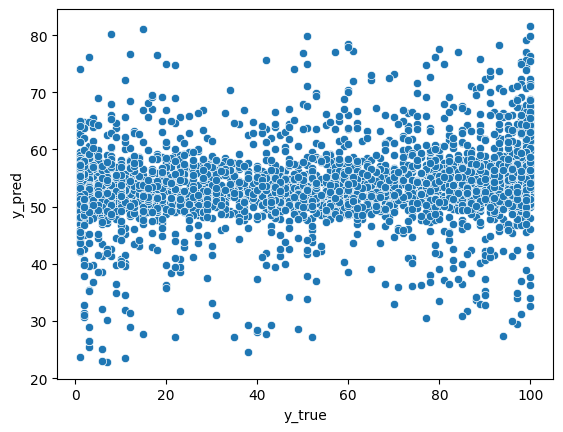

In [30]:
df_predictions = pd.DataFrame()
df_predictions["y_true"] = testing_response
df_predictions["y_pred"] = predictions_testing

sns.scatterplot(data=df_predictions, x="y_true", y="y_pred")

### Classification Models using single NPZ file

In [4]:
import numpy as np

In [5]:
train_data = np.load("../processed_dataset/antimicrobial/train_data.npz")

In [6]:
clf_model = ClassificationModels(train_data=train_data)

In [7]:
clf_model.instanceAdaBoost()
clf_model.processModel(kfold=True, k=5)

In [8]:
clf_model.performances

{'training_metrics': {'f1_weighted': 0.7490147107429281,
  'recall_weighted': 0.7490740740740741,
  'precision_weighted': 0.749212468282311,
  'accuracy': 0.7490740740740741},
 'validation_metrics': {'Accuracy': 0.6925925925925925,
  'Precision': 0.6926877470355731,
  'Recall': 0.6925925925925925,
  'F1-score': 0.6925546363748611,
  'MCC': 0.3852803278778021,
  'Confusion Matrix': [[0.6814814814814815, 0.31851851851851853],
   [0.2962962962962963, 0.7037037037037037]]}}

In [9]:
predictions_testing = clf_model.makePredictionsWithModel(X_matrix=train_data['X_test'])
performances_testing = clf_model.evalModel(y_true=train_data['y_test'], y_pred=predictions_testing)
performances_testing

{'Accuracy': 0.7466666666666667,
 'Precision': 0.7474309256190944,
 'Recall': 0.7466666666666667,
 'F1-score': 0.7462150115885184,
 'MCC': 0.4935554180328382,
 'Confusion Matrix': [[0.7074829931972789, 0.2925170068027211],
  [0.21568627450980393, 0.7843137254901961]]}

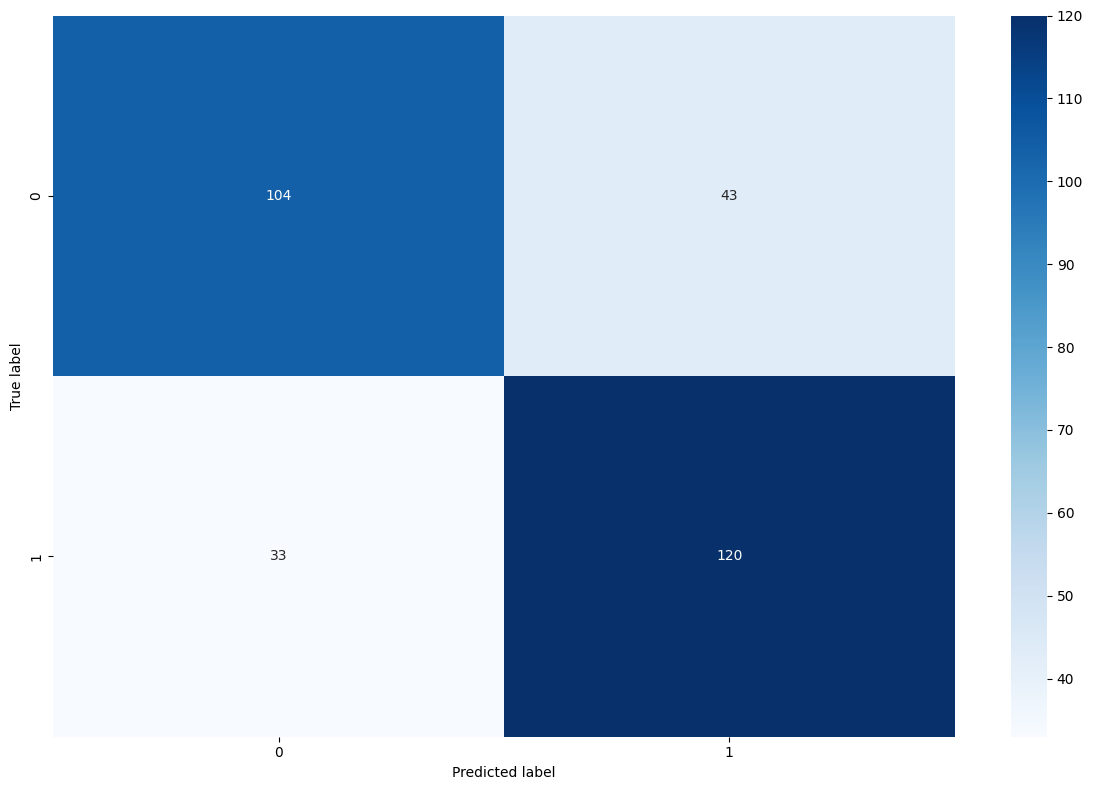

In [10]:
plotConfusionMatrix(y_true=train_data['y_test'], y_pred=predictions_testing)

### Regression Models using single NPZ file

In [8]:
train_data = np.load("../processed_dataset/protein_solubility/train_data.npz")

In [9]:
rgx_model = RegressionModels(train_data=train_data)

In [10]:
rgx_model.instanceRandomForest(n_estimators=500, n_jobs=-1)

rgx_model.processModel(kfold=True)

In [11]:
rgx_model.performances

{'training_metrics': {'MAE': 29.770459814814814,
  'MSE': 1148.7211572864444,
  'R2': -0.0238188828670327,
  'RMSE': 33.88670738330614},
 'validation_metrics': {'R2': -0.016880254413013107,
  'MAE': 30.37024888888889,
  'MSE': 1180.9120330512592,
  'Kendall-tau': 0.0012804913615380538,
  'Pearson': 0.00632361130400881,
  'Spearman': -0.0006063773387053095}}

In [12]:
predictions_testing = rgx_model.makePredictionsWithModel(X_matrix=train_data['X_test'])
performances_testing = rgx_model.evalModel(type_model="rgx", y_true=train_data['y_test'], y_pred=predictions_testing)
performances_testing

{'R2': -0.028293752588349097,
 'MAE': 28.762526666666666,
 'MSE': 1089.1150886586665,
 'Kendall-tau': -0.03366468684065021,
 'Pearson': -0.03695991355071207,
 'Spearman': -0.04842676536442911}

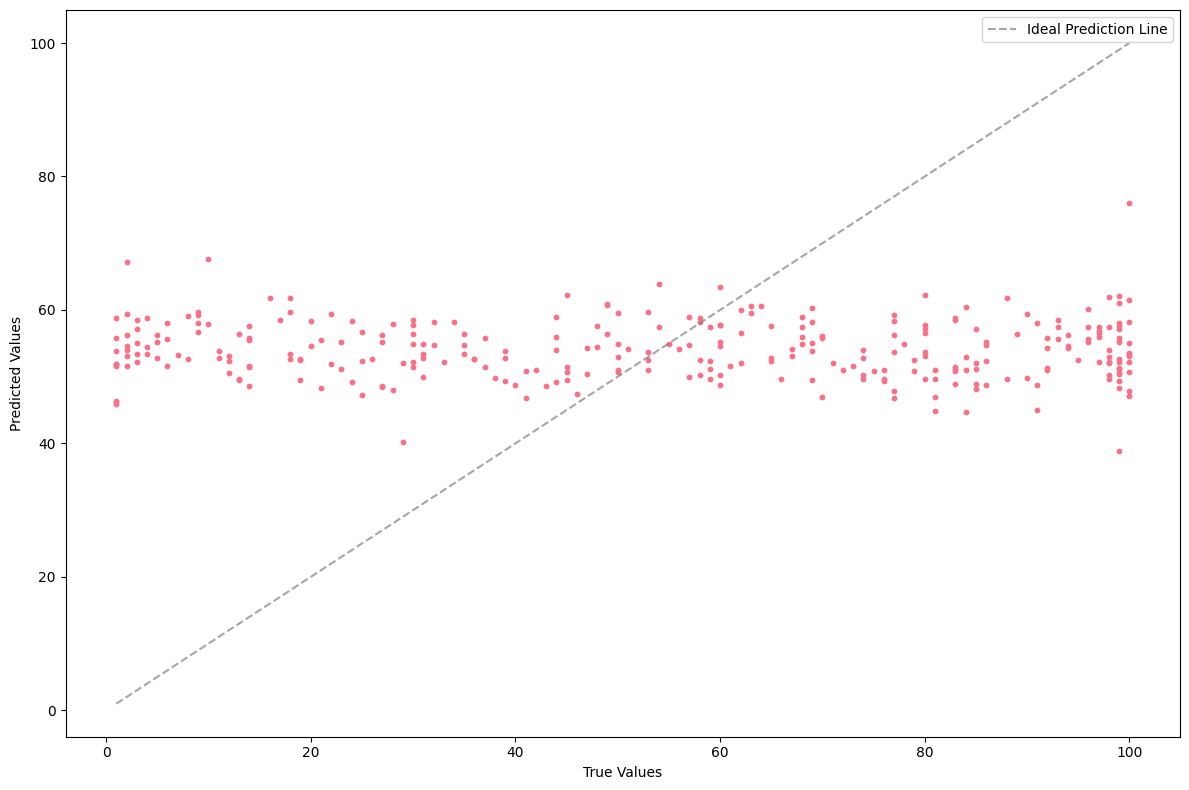

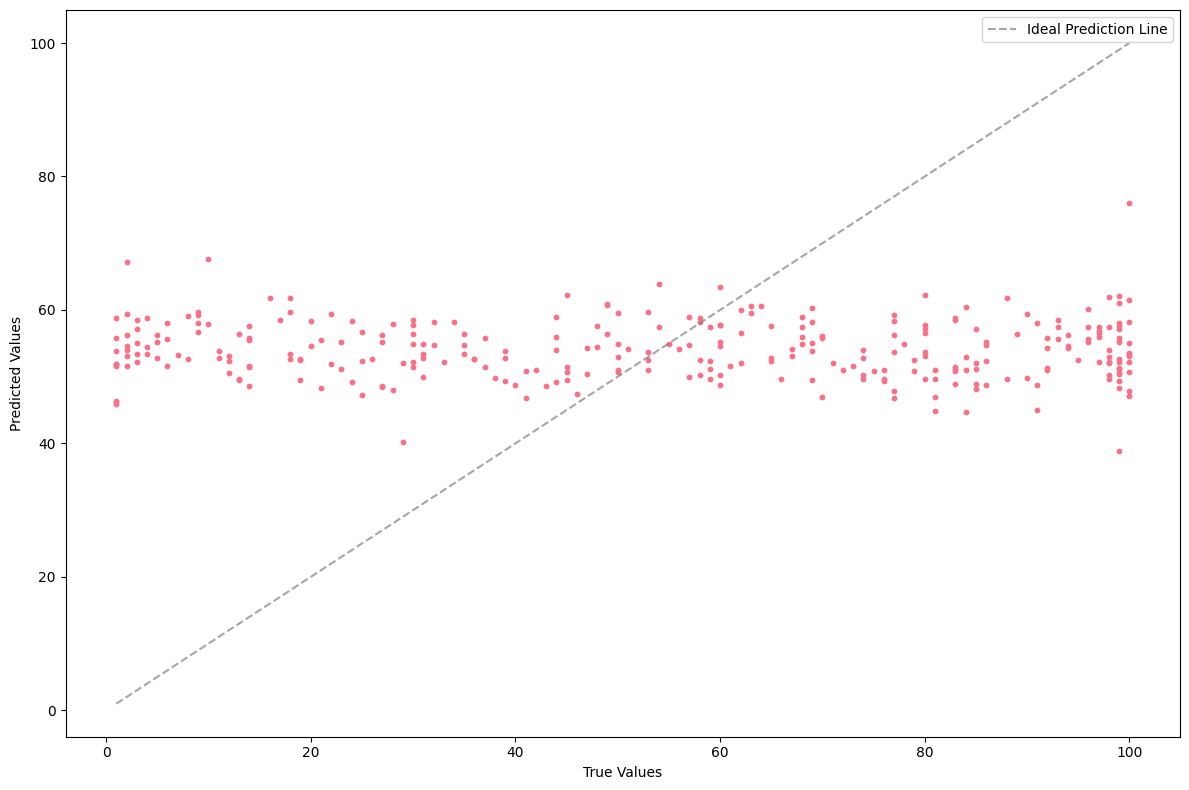

In [ ]:
plotPredictions(y_true=train_data['y_test'], y_pred=predictions_testing, show_line=True)